In [1]:
import pandas as pd 
import numpy as np 

In [2]:
df1 = pd.read_csv('E:/New_Network_Project/Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv')
df2 = pd.read_csv('E:/New_Network_Project/Friday-WorkingHours-Afternoon-PortScan.pcap_ISCX.csv')
df3 = pd.read_csv('E:/New_Network_Project/Friday-WorkingHours-Morning.pcap_ISCX.csv')
df4 = pd.read_csv('E:/New_Network_Project/Thursday-WorkingHours-Afternoon-Infilteration.pcap_ISCX.csv')
df5 =pd.read_csv('E:/New_Network_Project/Thursday-WorkingHours-Morning-WebAttacks.pcap_ISCX.csv',encoding='cp1252')

C:\Users\nihar\AppData\Local\Temp\ipykernel_40852\2306403057.py:1: DtypeWarning: Columns (85) have mixed types. Specify dtype option on import or set low_memory=False.
  df1 = pd.read_csv('E:/New_Network_Project/Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv')
C:\Users\nihar\AppData\Local\Temp\ipykernel_40852\2306403057.py:5: DtypeWarning: Columns (0,1,3,6,84) have mixed types. Specify dtype option on import or set low_memory=False.
  df5 =pd.read_csv('E:/New_Network_Project/Thursday-WorkingHours-Morning-WebAttacks.pcap_ISCX.csv',encoding='cp1252')


In [3]:
columns_df1 = set(df1.columns)
columns_df2 = set(df2.columns)
columns_df3 = set(df3.columns)
columns_df4 = set(df4.columns)
columns_df5 = set(df5.columns)
if columns_df1==columns_df2==columns_df3==columns_df4==columns_df5:
    print('Yes the columns of all 5 datasets is same')
else:
    print("the datasets are different so you can't merge them")

the datasets are different so you can't merge them


In [4]:
print(df1.shape,df2.shape,df3.shape,df4.shape,df5.shape)

(225745, 86) (286467, 85) (191033, 85) (288602, 85) (458968, 85)


In [5]:
if columns_df2==columns_df3==columns_df4==columns_df5:
    print('Yes the columns of all 4 datasets is same')
else:
    print("the datasets are different so you can't merge them")

Yes the columns of all 4 datasets is same


In [6]:
df1.drop(['External IP'],axis=1,inplace=True)
if (df1.columns.all() == df2.columns.all()):
    print("yes columns are same,Now you can merge all 5 datasets")
else:
    print('Columns are still different')

yes columns are same,Now you can merge all 5 datasets


In [7]:
df = pd.concat([df1,df2,df3,df4,df5], axis=0)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1450815 entries, 0 to 458967
Data columns (total 85 columns):
 #   Column                        Non-Null Count    Dtype  
---  ------                        --------------    -----  
 0   Flow ID                       1162213 non-null  object 
 1    Source IP                    1162213 non-null  object 
 2    Source Port                  1162213 non-null  float64
 3    Destination IP               1162213 non-null  object 
 4    Destination Port             1162213 non-null  float64
 5    Protocol                     1162213 non-null  float64
 6    Timestamp                    1162213 non-null  object 
 7    Flow Duration                1162213 non-null  float64
 8    Total Fwd Packets            1162213 non-null  float64
 9    Total Backward Packets       1162213 non-null  float64
 10  Total Length of Fwd Packets   1162213 non-null  float64
 11   Total Length of Bwd Packets  1162213 non-null  float64
 12   Fwd Packet Length Max        1162

In [9]:
df.isnull().sum()

Flow ID              288602
 Source IP           288602
 Source Port         288602
 Destination IP      288602
 Destination Port    288602
                      ...  
Idle Mean            288602
 Idle Std            288602
 Idle Max            288602
 Idle Min            288602
 Label               288602
Length: 85, dtype: int64

In [10]:
df.dropna(axis=0, inplace=True)

In [11]:
df.isnull().sum().sum()

0

In [12]:
df.duplicated().sum()

148

In [13]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

In [14]:
import matplotlib.pyplot as plt 
import seaborn as sns 

In [15]:
import ipaddress
from datetime import datetime
df['Source_IP'] = df[' Source IP'].apply(lambda x: int(ipaddress.IPv4Address(x)))
df['Destination_IP'] = df[' Destination IP'].apply(lambda x: int(ipaddress.IPv4Address(x)))
df['Flow_ID'] = df['Flow ID'].apply(hash)
# Convert Timestamp column to datetime format
df[' Timestamp'] = pd.to_datetime(df[' Timestamp'], errors='coerce')
# Convert datetime to Unix timestamp (seconds since Jan 1, 1970)
df['Timestamp_int'] = (df[' Timestamp'].astype('int64') // 10**9).astype('int32')

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1161980 entries, 0 to 170365
Data columns (total 89 columns):
 #   Column                        Non-Null Count    Dtype         
---  ------                        --------------    -----         
 0   Flow ID                       1161980 non-null  object        
 1    Source IP                    1161980 non-null  object        
 2    Source Port                  1161980 non-null  float64       
 3    Destination IP               1161980 non-null  object        
 4    Destination Port             1161980 non-null  float64       
 5    Protocol                     1161980 non-null  float64       
 6    Timestamp                    1161980 non-null  datetime64[ns]
 7    Flow Duration                1161980 non-null  float64       
 8    Total Fwd Packets            1161980 non-null  float64       
 9    Total Backward Packets       1161980 non-null  float64       
 10  Total Length of Fwd Packets   1161980 non-null  float64       
 11   Tot

In [17]:
df[' Label'].unique()

array(['BENIGN', 'DDoS', 'PortScan', 'Bot', 'Infiltration',
       'Web Attack – Brute Force', 'Web Attack – XSS',
       'Web Attack – Sql Injection'], dtype=object)

In [18]:
df[' Label'].replace({'BENIGN':1, 'DDoS':2, 'PortScan':3, 'Bot':4, 'Infiltration':5,'Web Attack – Brute Force':6, 'Web Attack – XSS':7,
       'Web Attack – Sql Injection':8},inplace=True)

In [19]:
df[' Label'].unique()

array([1, 2, 3, 4, 5, 6, 7, 8], dtype=int64)

In [20]:
df.drop([' Timestamp'],axis=1,inplace=True)

In [21]:
object_columns = df.select_dtypes(include=['object']).columns.tolist()
df_filtered = df.drop(columns=object_columns)

In [22]:
# Assuming 'df' is your DataFrame and 'target_column' is the target variable column name
correlation_matrix = df_filtered.corr()
correlation_with_target = correlation_matrix[' Label'].abs().sort_values(ascending=False)
selected_features = correlation_with_target[correlation_with_target > 0.5].index.tolist()  # Adjust the threshold
final_df = df_filtered[selected_features]

In [23]:
correlation_matrix

,Source Port,Destination Port,Protocol,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,...,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label,Source_IP,Destination_IP,Flow_ID,Timestamp_int
Source Port,1.000000,-0.600790,0.275173,0.030037,0.002024,0.002132,-0.020443,0.002057,-0.172514,-0.027021,...,0.001504,0.026099,0.005028,0.024061,0.026016,0.141900,0.425283,-0.003770,-0.000480,-0.015202
Destination Port,-0.600790,1.000000,-0.308961,-0.079717,-0.004095,-0.003684,0.027259,-0.003000,0.241907,0.036147,...,-0.000756,-0.016590,0.051017,-0.001453,-0.032573,-0.011382,-0.479843,0.143985,-0.000115,-0.003565
Protocol,0.275173,-0.308961,1.000000,-0.193057,-0.006499,-0.005680,-0.023120,-0.004532,-0.124550,0.217230,...,-0.066684,-0.091992,-0.085871,-0.103446,-0.069199,-0.301079,0.289434,0.265973,0.002995,-0.136426
Flow Duration,0.030037,-0.079717,-0.193057,1.000000,0.024273,0.022621,0.060555,0.017389,0.275893,-0.059749,...,0.197272,0.706627,0.351032,0.713401,0.633157,-0.107966,0.099939,-0.308795,0.001331,0.005504
Total Fwd Packets,0.002024,-0.004095,-0.006499,0.024273,1.000000,0.998904,0.285446,0.995276,0.007432,-0.002302,...,0.015244,0.005172,0.000916,0.004845,0.005096,-0.004050,0.003346,-0.018002,-0.001951,-0.002152
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Label,0.141900,-0.011382,-0.301079,-0.107966,-0.004050,-0.003651,-0.010060,-0.002729,-0.095910,-0.103128,...,-0.019445,-0.059488,0.007256,-0.050534,-0.064473,1.000000,-0.095717,0.182257,-0.001969,0.324329
Source_IP,0.425283,-0.479843,0.289434,0.099939,0.003346,0.003733,0.015453,0.002521,0.088090,0.084110,...,0.020157,0.061366,0.000359,0.053547,0.064330,-0.095717,1.000000,-0.160996,0.002734,-0.066838
Destination_IP,-0.003770,0.143985,0.265973,-0.308795,-0.018002,-0.016907,-0.025621,-0.014273,-0.131033,0.067987,...,-0.042825,-0.076220,0.022523,-0.061291,-0.084602,0.182257,-0.160996,1.000000,0.001780,0.078299
Flow_ID,-0.000480,-0.000115,0.002995,0.001331,-0.001951,-0.001904,-0.001574,-0.001941,0.000911,0.000475,...,-0.000847,0.001081,0.000301,0.000978,0.001073,-0.001969,0.002734,0.001780,1.000000,-0.001739


In [24]:
final_df.columns

Index([' Label'], dtype='object')

In [25]:
print(np.any(np.isinf(df_filtered)))

# Check for large values
print(np.any(np.abs(df_filtered) > np.finfo(np.float64).max))

True
True


In [26]:
# Replace infinite values with NaN
df_filtered[np.isinf(df_filtered)] = np.nan

# Replace large values with a maximum finite value
max_finite_value = np.finfo(np.float64).max
df_filtered[np.abs(df_filtered) > max_finite_value] = max_finite_value

In [27]:
from sklearn.preprocessing import StandardScaler

# Use StandardScaler or other appropriate scalers
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_filtered)

In [28]:
df_filtered.isna().sum().sum()

1568

In [29]:
df_filtered.dropna(inplace=True)

In [30]:
df_filtered.shape

(1161196, 85)

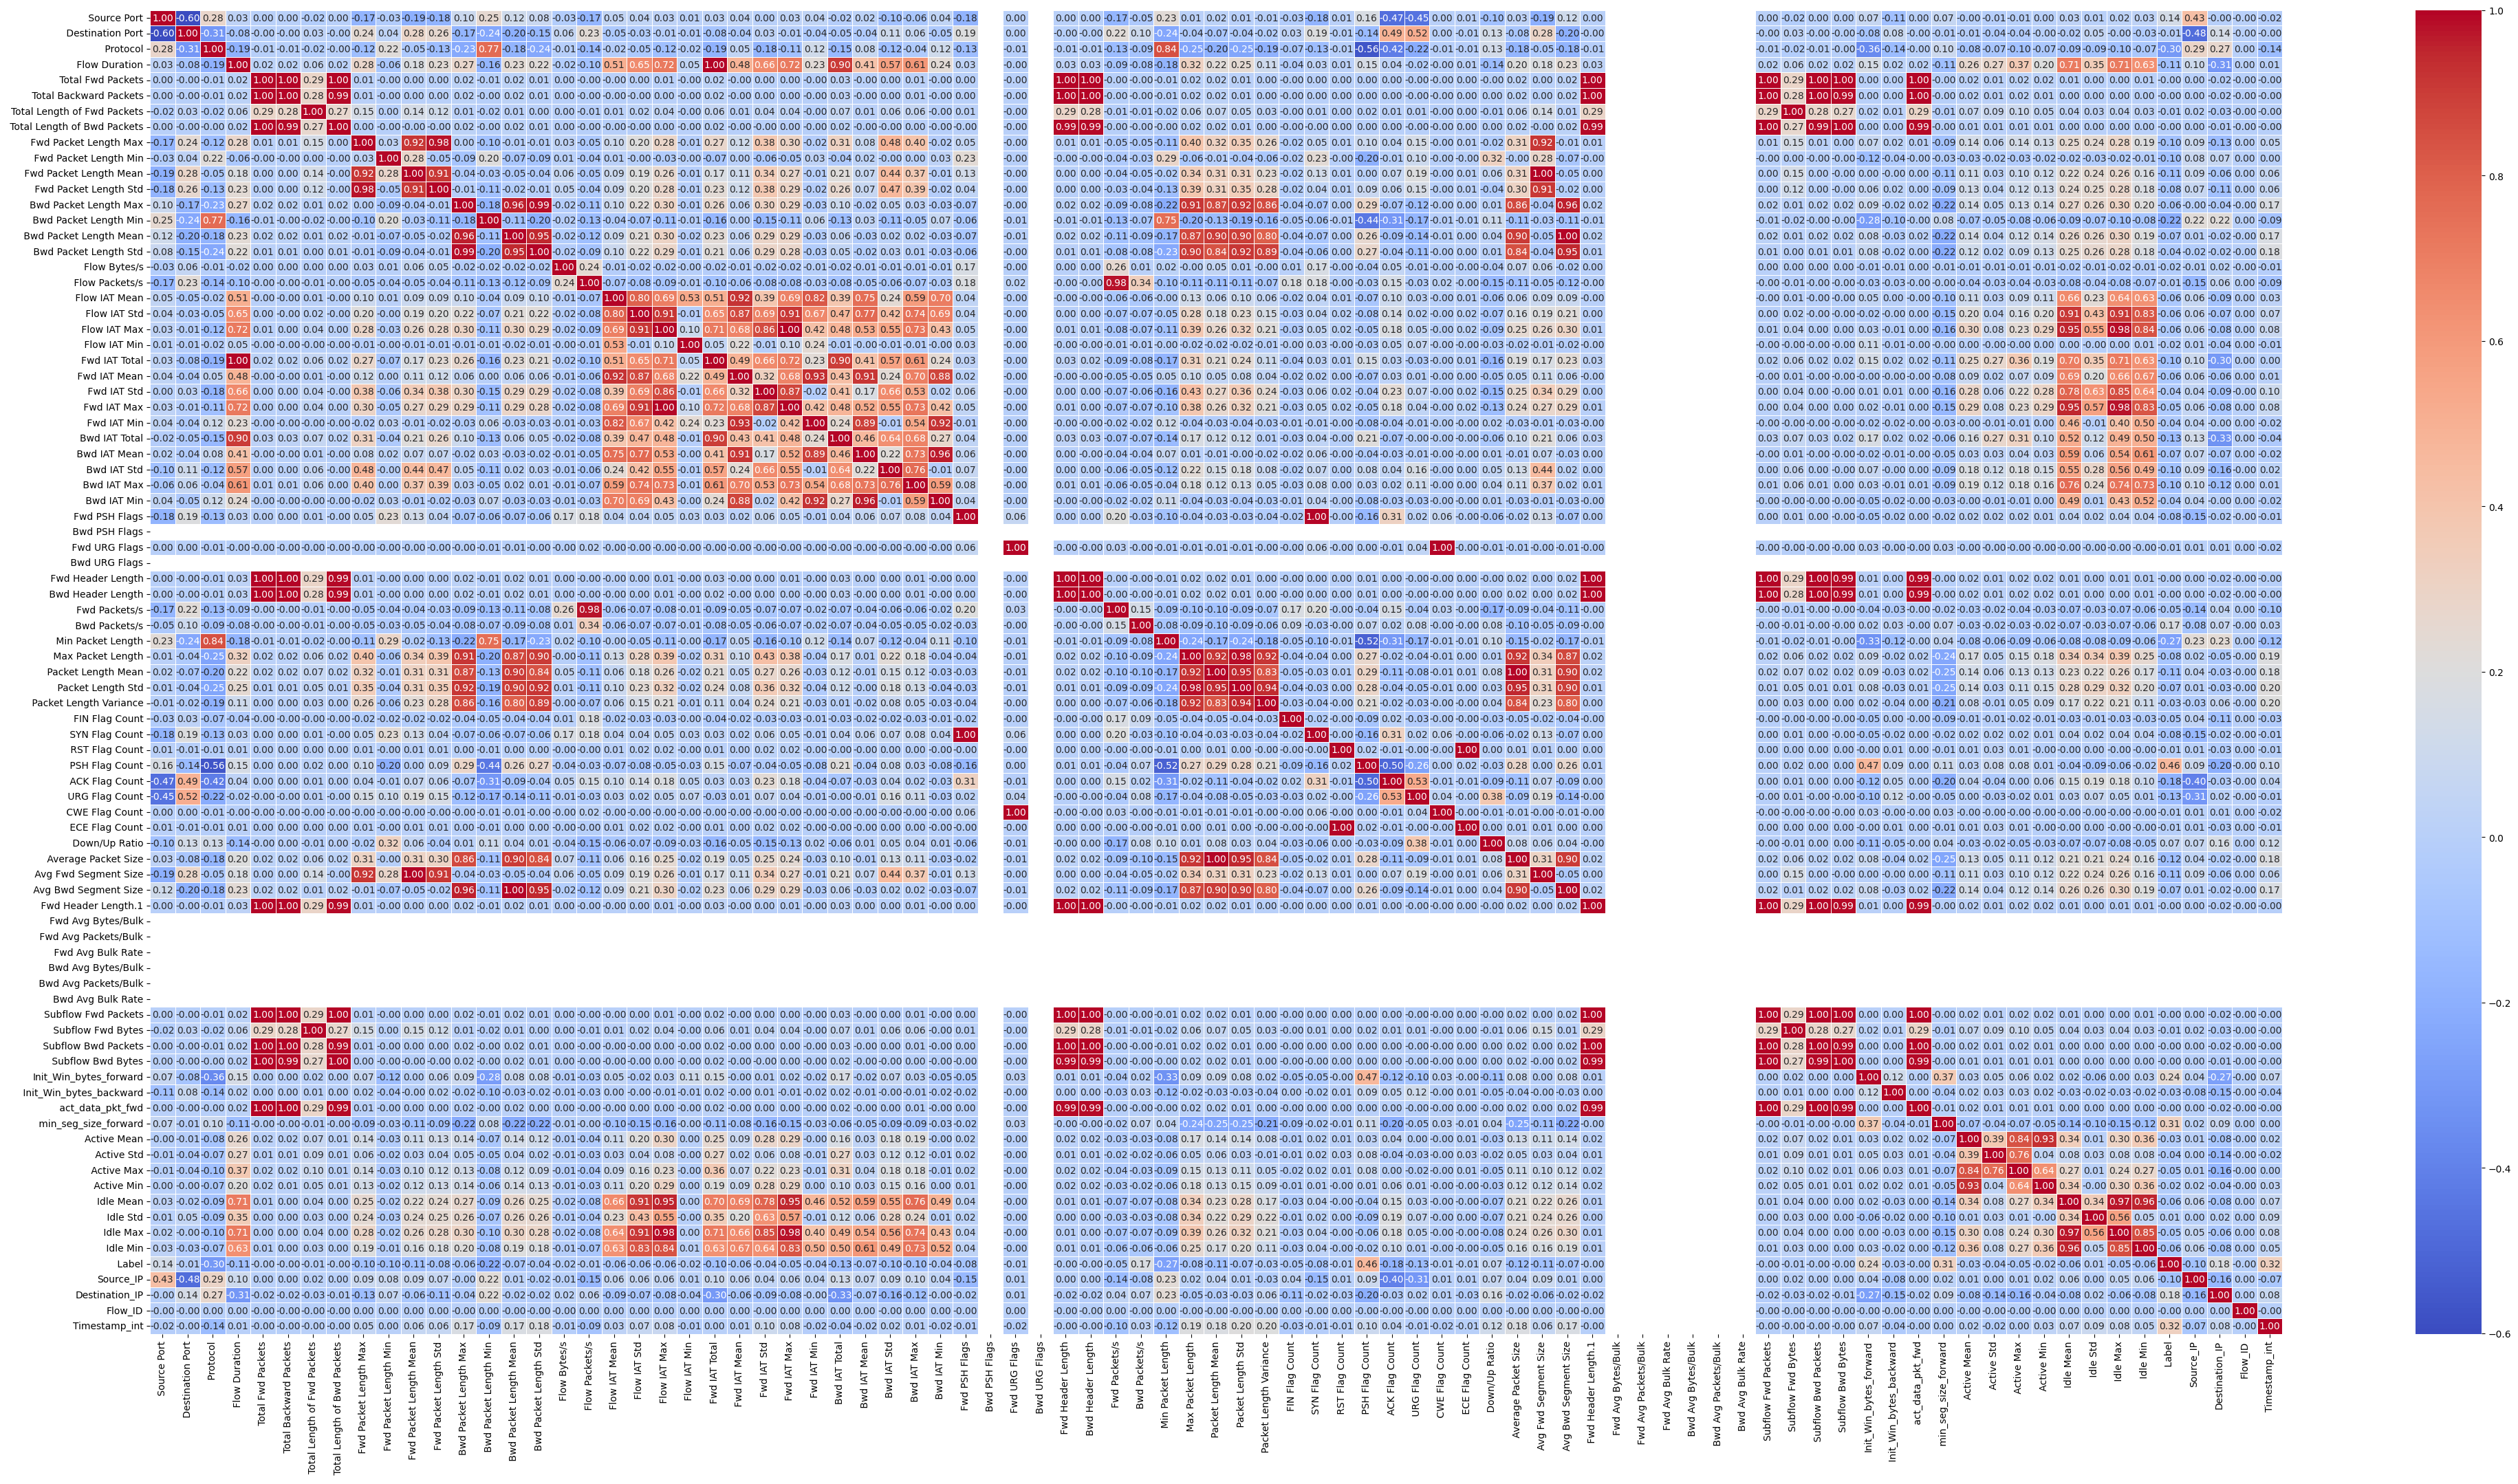

In [31]:
plt.figure(figsize=(50,25))
sns.heatmap(correlation_matrix,annot=True,cmap='coolwarm',fmt='.2f',linewidths=0.5)
plt.show()

In [32]:
df_filtered.columns

Index([' Source Port', ' Destination Port', ' Protocol', ' Flow Duration',
       ' Total Fwd Packets', ' Total Backward Packets',
       'Total Length of Fwd Packets', ' Total Length of Bwd Packets',
       ' Fwd Packet Length Max', ' Fwd Packet Length Min',
       ' Fwd Packet Length Mean', ' Fwd Packet Length Std',
       'Bwd Packet Length Max', ' Bwd Packet Length Min',
       ' Bwd Packet Length Mean', ' Bwd Packet Length Std', 'Flow Bytes/s',
       ' Flow Packets/s', ' Flow IAT Mean', ' Flow IAT Std', ' Flow IAT Max',
       ' Flow IAT Min', 'Fwd IAT Total', ' Fwd IAT Mean', ' Fwd IAT Std',
       ' Fwd IAT Max', ' Fwd IAT Min', 'Bwd IAT Total', ' Bwd IAT Mean',
       ' Bwd IAT Std', ' Bwd IAT Max', ' Bwd IAT Min', 'Fwd PSH Flags',
       ' Bwd PSH Flags', ' Fwd URG Flags', ' Bwd URG Flags',
       ' Fwd Header Length', ' Bwd Header Length', 'Fwd Packets/s',
       ' Bwd Packets/s', ' Min Packet Length', ' Max Packet Length',
       ' Packet Length Mean', ' Packet Length Std',

In [33]:
final_df.columns

Index([' Label'], dtype='object')

In [34]:
boxp = df_filtered[['Flow_ID','Source_IP',' Source Port', 'Destination_IP',' Destination Port',' Protocol',
                    'Flow Bytes/s',' Flow Packets/s',' Flow Duration',' Bwd Packets/s','Fwd Packets/s',' Label']]

In [35]:
hm = boxp.corr()

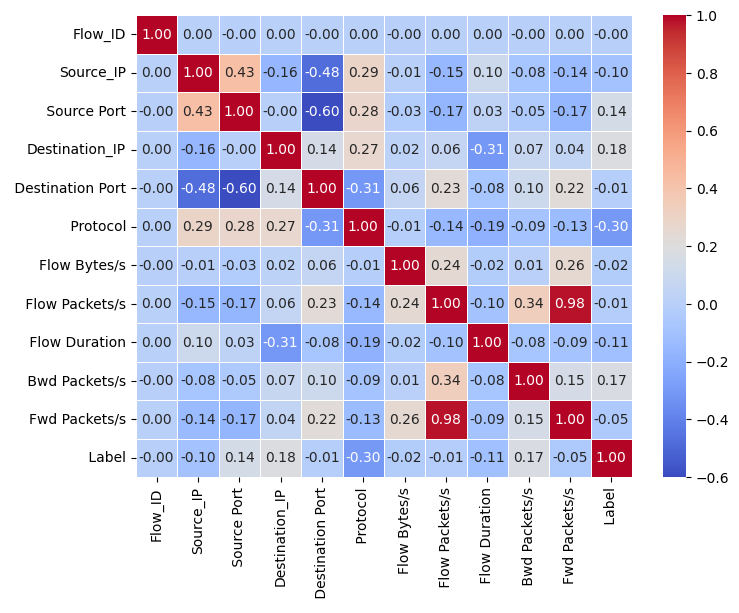

In [36]:
plt.figure(figsize=(8,6))
sns.heatmap(hm,annot=True,cmap='coolwarm',fmt='.2f',linewidths=0.5)
plt.show()

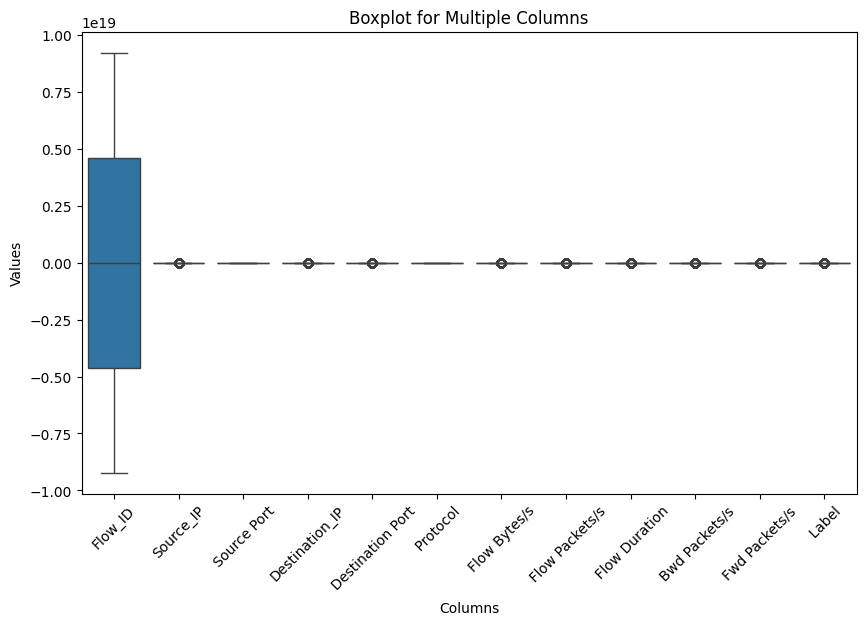

In [37]:
melted_df = boxp.melt(var_name='Columns', value_name='Values')

# Create a boxplot using Seaborn
plt.figure(figsize=(10, 6))  # Adjust figure size if needed
sns.boxplot(x='Columns', y='Values', data=melted_df)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.title('Boxplot for Multiple Columns')
plt.xlabel('Columns')
plt.ylabel('Values')
plt.show()

<Figure size 1000x600 with 0 Axes>

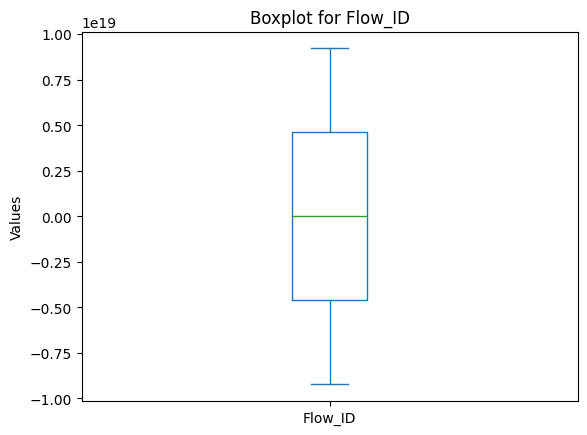

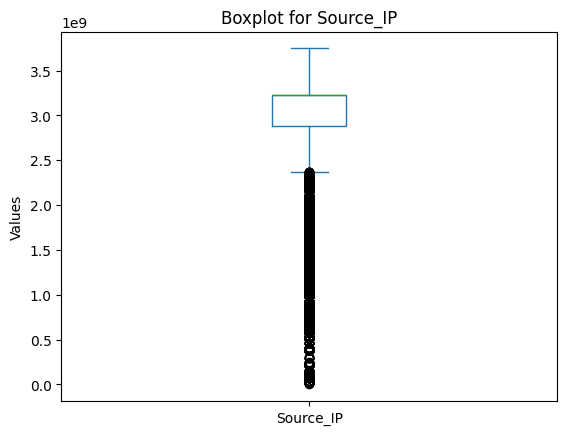

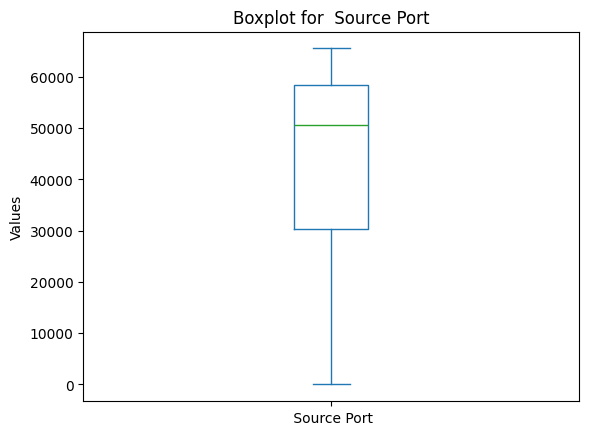

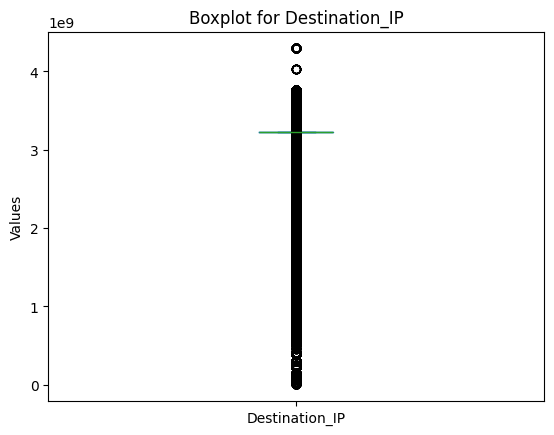

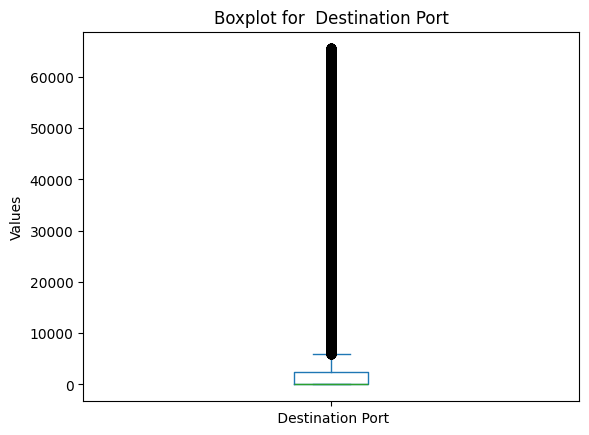

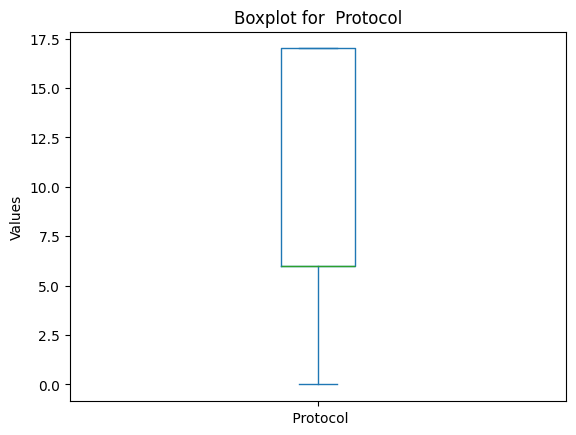

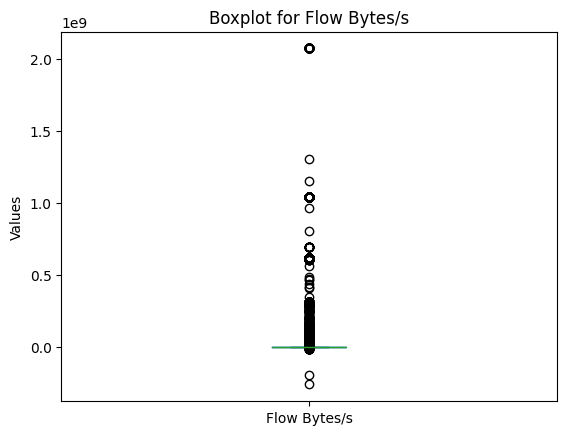

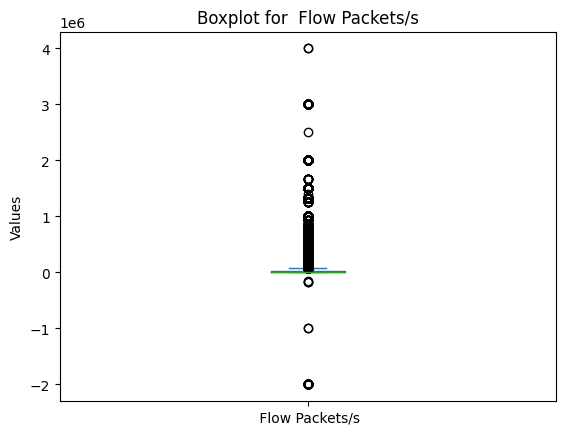

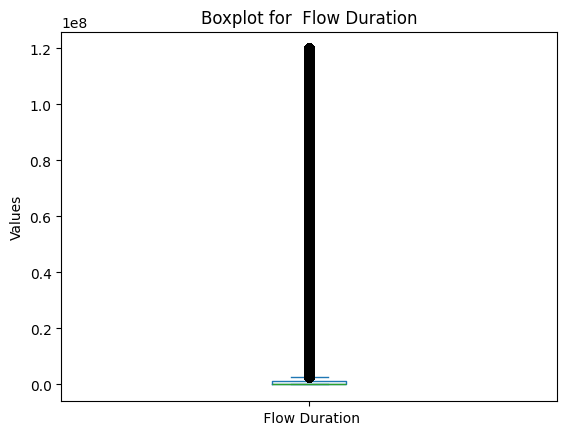

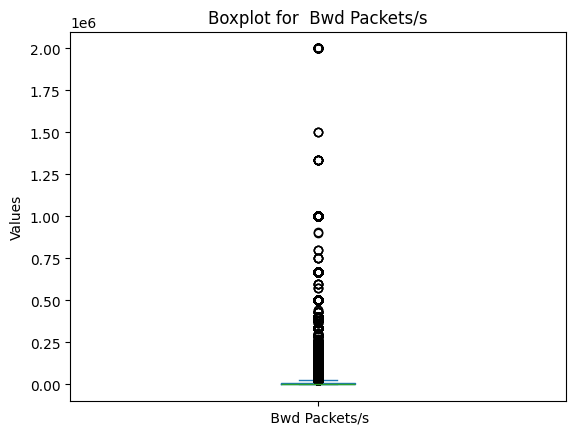

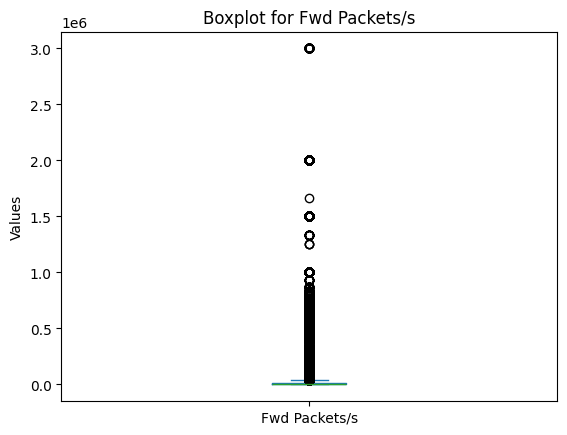

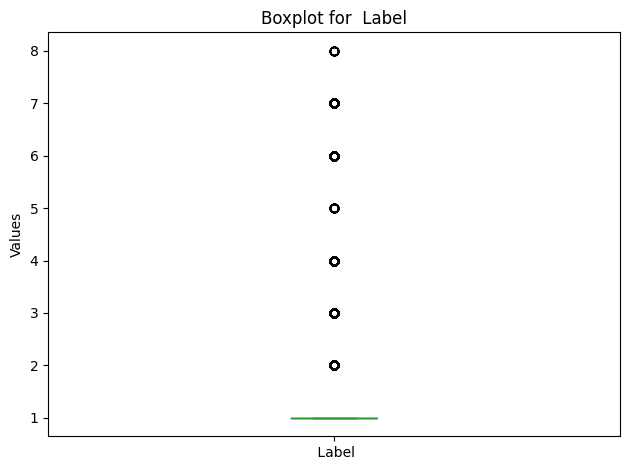

In [38]:
plt.figure(figsize=(10, 6))  # Adjust figure size if needed

for column in boxp.columns:
    plt.figure()  # Create a new figure for each boxplot
    df[column].plot(kind='box')
    plt.title(f'Boxplot for {column}')
    plt.ylabel('Values')

plt.tight_layout()  # Adjust layout for better spacing between plots
plt.show()

In [39]:
Q1 = boxp.quantile(0.25)
Q3 = boxp.quantile(0.75)

# Calculate IQR (Interquartile Range)
IQR = Q3 - Q1

# Define the threshold for identifying outliers
threshold = 1.5

# Identify and remove outliers
outlier_condition = (boxp < (Q1 - threshold * IQR)) | (boxp > (Q3 + threshold * IQR))
cleaned_data = boxp[~outlier_condition.any(axis=1)]

print(cleaned_data)

                    Flow_ID   Source_IP   Source Port  Destination_IP  \
21      5035256933814365028  3232238083       61539.0      3232238081   
22      7048702728424942598  3232238095       51561.0      3232238083   
28     -6333619599449351281  3232238085       61822.0      3232238083   
30      4479386681732367991  3232238083       61522.0      3232238081   
31      7404015955777488715  3232238083       61739.0      3232238081   
...                     ...         ...           ...             ...   
170344  1144296947792120950  3232238097       45896.0      3232238130   
170347  1144296947792120950  3232238097       45896.0      3232238130   
170359   988442267482520965  3232238092       60146.0      3232238130   
170363 -6864502239432690384  3232238092       60148.0      3232238130   
170364   988442267482520965  3232238092       60146.0      3232238130   

         Destination Port   Protocol  Flow Bytes/s   Flow Packets/s  \
21                   53.0       17.0   4503.547606  

In [40]:
cleaned_data.columns

Index(['Flow_ID', 'Source_IP', ' Source Port', 'Destination_IP',
       ' Destination Port', ' Protocol', 'Flow Bytes/s', ' Flow Packets/s',
       ' Flow Duration', ' Bwd Packets/s', 'Fwd Packets/s', ' Label'],
      dtype='object')

In [41]:
cleaned_data[' Label'].unique()

array([1], dtype=int64)

In [42]:
(boxp.shape,cleaned_data.shape)

((1161196, 12), (287582, 12))

In [43]:
1161196-287582

873614

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns
import itertools

In [45]:
pie = df[' Label'].replace({1:'BENIGN', 2:'DDoS', 3:'PortScan', 4:'Bot', 5:'Infiltration',6:'Web Attack – Brute Force', 7:'Web Attack – XSS',
       8:'Web Attack – Sql Injection'})

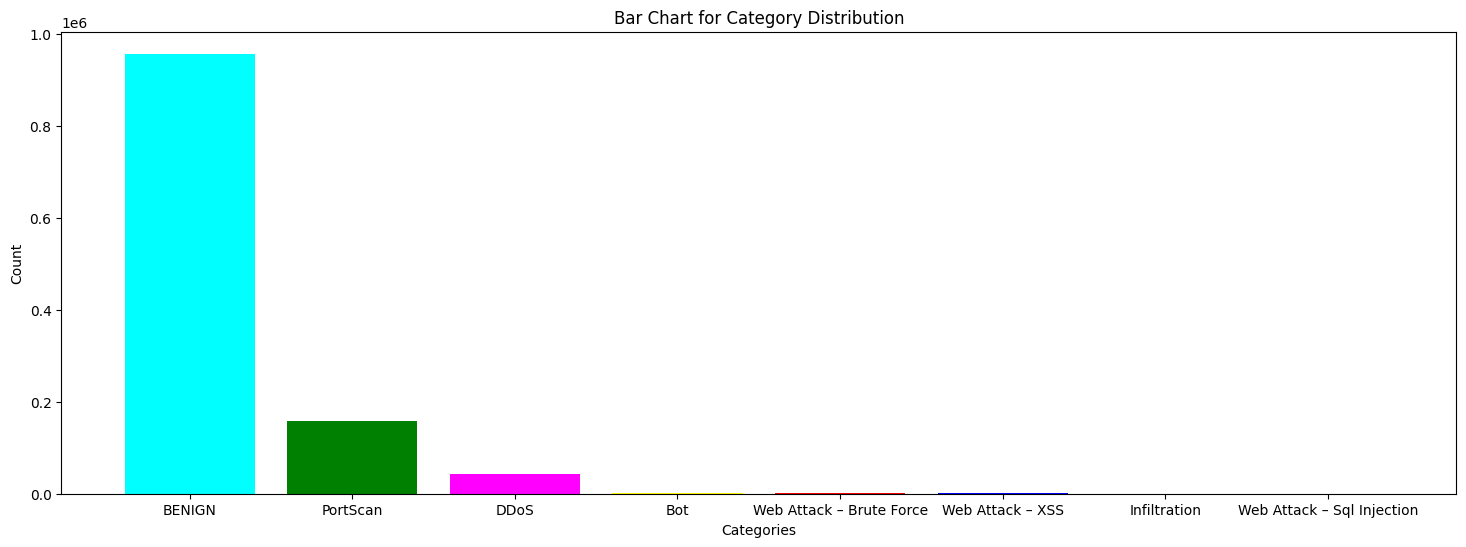

In [46]:
value_counts = pie.value_counts()
colors = ['cyan', 'green', 'Magenta','yellow', 'red', 'blue', 'Orange', 'Purple']
# Plotting a bar chart
plt.figure(figsize=(18, 6))
plt.bar(value_counts.index, value_counts.values,color=colors)
plt.xlabel('Categories')
plt.ylabel('Count')
plt.title('Bar Chart for Category Distribution')
plt.show()

C:\Users\nihar\AppData\Local\Temp\ipykernel_40852\2541854264.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[' Label'], shade=True,color='Cyan')


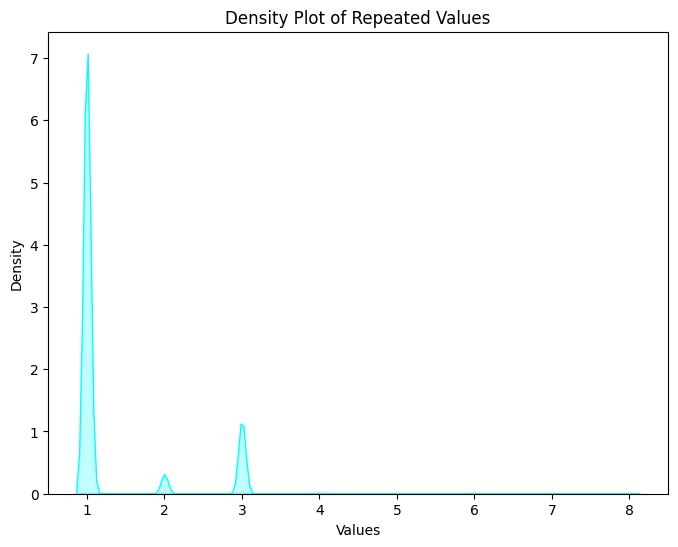

In [47]:
plt.figure(figsize=(8, 6))
sns.kdeplot(df[' Label'], shade=True,color='Cyan')
plt.xlabel('Values')
plt.ylabel('Density')
plt.title('Density Plot of Repeated Values')
plt.show()

In [49]:
from sklearn.model_selection import train_test_split

In [50]:
X = boxp.drop(columns=[' Label'])
Y = boxp[' Label']

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.4, random_state=42, shuffle=True, stratify=Y)

In [52]:
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (696717, 11)
X_test shape: (464479, 11)
y_train shape: (696717,)
y_test shape: (464479,)


In [53]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.calibration import CalibratedClassifierCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, roc_auc_score, auc

In [54]:
Dtc = DecisionTreeClassifier()

In [55]:
Dtc.fit(X_train, y_train)

DecisionTreeClassifier()

In [56]:
y_predict = Dtc.predict(X_test)

# Evaluate the model
accuracy = metrics.accuracy_score(y_test, y_predict)
print("Accuracy:", accuracy)

Accuracy: 0.9944432364003539


In [57]:
report = classification_report(y_test, y_predict)
print("Classification Report:")
print(report)

Classification Report:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00    382555
           2       0.93      0.93      0.93     16734
           3       1.00      1.00      1.00     63522
           4       0.99      0.99      0.99       782
           5       1.00      0.86      0.92        14
           6       0.86      0.85      0.85       603
           7       0.69      0.69      0.69       261
           8       1.00      0.88      0.93         8

    accuracy                           0.99    464479
   macro avg       0.93      0.90      0.91    464479
weighted avg       0.99      0.99      0.99    464479



In [58]:
y_predict_proba = Dtc.predict_proba(X_test)

In [59]:
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(len(Dtc.classes_)):
    fpr[i], tpr[i], _ = roc_curve(y_test == Dtc.classes_[i], y_predict_proba[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

In [60]:
fpr_micro, tpr_micro, _ = roc_curve(pd.get_dummies(y_test).values.ravel(), y_predict_proba.ravel())
roc_auc_micro = auc(fpr_micro, tpr_micro)

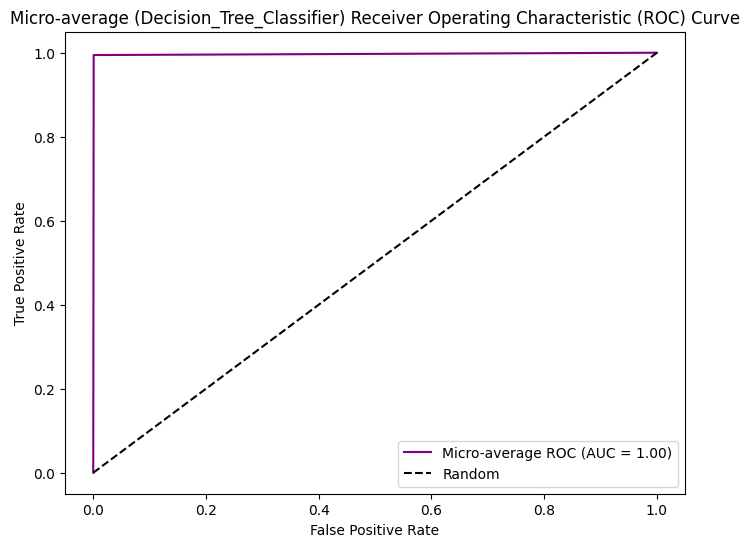

In [61]:
plt.figure(figsize=(8, 6))
plt.plot(fpr_micro, tpr_micro, label=f'Micro-average ROC (AUC = {roc_auc_micro:.2f})', color='purple')
plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Micro-average (Decision_Tree_Classifier) Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

In [62]:
gnb = GaussianNB()
clf = CalibratedClassifierCV(gnb, method='sigmoid', cv='prefit')
gnb.fit(X_train, y_train)

GaussianNB()

In [63]:
y_predi= gnb.predict(X_test)

accuracy = metrics.accuracy_score(y_test, y_predi)
print("Accuracy:", accuracy)

Accuracy: 0.8236217353206496


In [64]:
clf.fit(X_train, y_train)

CalibratedClassifierCV(cv='prefit', estimator=GaussianNB())

In [65]:
y_pre_clf= clf.predict(X_test)

accuracy = metrics.accuracy_score(y_test, y_pre_clf)
print("Accuracy:", accuracy)

Accuracy: 0.8236217353206496


In [66]:
report = classification_report(y_test, y_predi)
print("Classification Report:")
print(report)

c:\Users\nihar\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Classification Report:
              precision    recall  f1-score   support

           1       0.82      1.00      0.90    382555
           2       0.00      0.00      0.00     16734
           3       0.00      0.00      0.00     63522
           4       0.00      0.00      0.00       782
           5       0.00      0.00      0.00        14
           6       0.00      0.00      0.00       603
           7       0.00      0.00      0.00       261
           8       0.00      0.00      0.00         8

    accuracy                           0.82    464479
   macro avg       0.10      0.12      0.11    464479
weighted avg       0.68      0.82      0.74    464479



c:\Users\nihar\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\nihar\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [67]:
y_predi_proba = clf.predict_proba(X_test)

In [68]:
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(len(clf.classes_)):
    fpr[i], tpr[i], _ = roc_curve(y_test == clf.classes_[i], y_predi_proba[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

In [69]:
fpr_micro_gnb, tpr_micro_gnb, _ = roc_curve(pd.get_dummies(y_test).values.ravel(), y_predi_proba.ravel())
roc_auc_micro_gnb = auc(fpr_micro_gnb, tpr_micro_gnb)

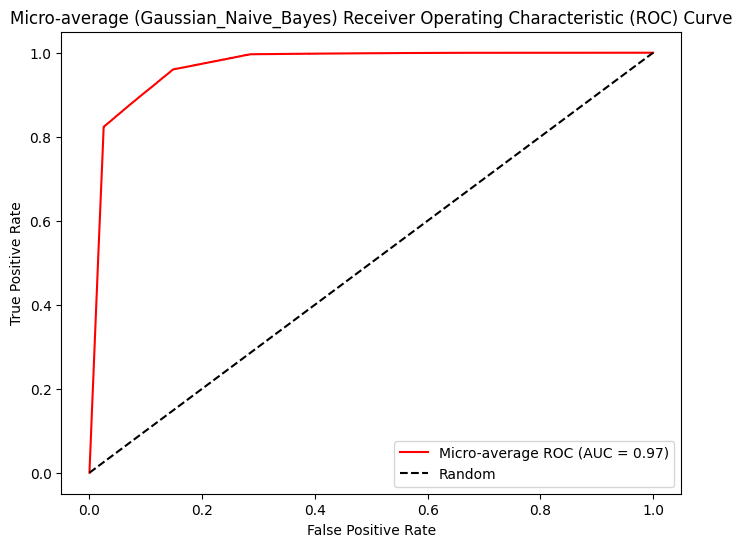

In [70]:
plt.figure(figsize=(8, 6))
plt.plot(fpr_micro_gnb, tpr_micro_gnb, label=f'Micro-average ROC (AUC = {roc_auc_micro_gnb:.2f})', color='red')
plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Micro-average (Gaussian_Naive_Bayes) Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

In [71]:
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_train,y_train)

RandomForestClassifier(random_state=42)

In [72]:
y_pred = rf_clf.predict(X_test)

accuracy = metrics.accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9922902865360974


In [73]:
report = classification_report(y_test, y_pred)
print("Classification Report:")
print(report)

Classification Report:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00    382555
           2       0.91      0.89      0.90     16734
           3       1.00      1.00      1.00     63522
           4       0.98      0.97      0.98       782
           5       1.00      0.50      0.67        14
           6       0.87      0.87      0.87       603
           7       0.71      0.72      0.71       261
           8       1.00      0.50      0.67         8

    accuracy                           0.99    464479
   macro avg       0.93      0.81      0.85    464479
weighted avg       0.99      0.99      0.99    464479



In [74]:
y_pred_proba = rf_clf.predict_proba(X_test)

In [75]:
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(len(rf_clf.classes_)):
    fpr[i], tpr[i], _ = roc_curve(y_test == rf_clf.classes_[i], y_pred_proba[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

In [76]:
fpr_micro_rfc, tpr_micro_rfc, _ = roc_curve(pd.get_dummies(y_test).values.ravel(), y_pred_proba.ravel())
roc_auc_micro_rfc = auc(fpr_micro_rfc, tpr_micro_rfc)

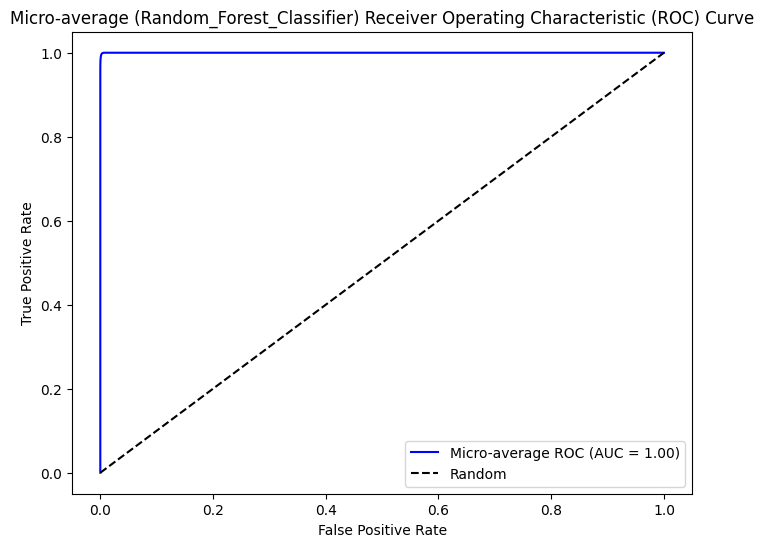

In [77]:
plt.figure(figsize=(8, 6))
plt.plot(fpr_micro_rfc, tpr_micro_rfc, label=f'Micro-average ROC (AUC = {roc_auc_micro_rfc:.2f})', color='blue')
plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Micro-average (Random_Forest_Classifier) Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

In [78]:
Log_Reg = LogisticRegression(multi_class='ovr')
Log_Reg.fit(X_train, y_train)

LogisticRegression(multi_class='ovr')

In [79]:
y_pre = Log_Reg.predict(X_test)

accuracy = metrics.accuracy_score(y_test, y_pre)
print("Accuracy:", accuracy)

Accuracy: 0.48105296471961057


In [80]:
y_pre_proba = Log_Reg.predict_proba(X_test)

In [81]:
fpr = dict()
tpr = dict()
roc_auc = dict()

In [82]:
for i in range(len(Log_Reg.classes_)):
    fpr[i], tpr[i], _ = roc_curve(y_test == Log_Reg.classes_[i], y_pre_proba[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

In [83]:
fpr_micro_lr, tpr_micro_lr, _ = roc_curve(pd.get_dummies(y_test).values.ravel(), y_pre_proba.ravel())
roc_auc_micro_lr = auc(fpr_micro_lr, tpr_micro_lr)

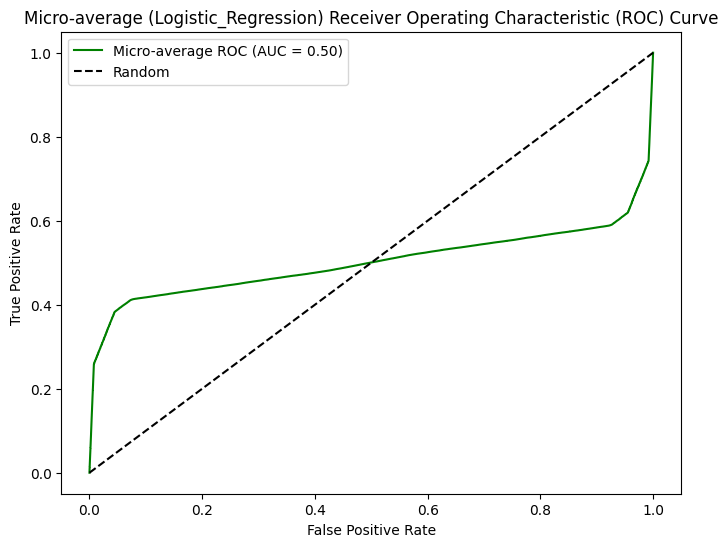

In [84]:
plt.figure(figsize=(8, 6))
plt.plot(fpr_micro_lr, tpr_micro_lr, label=f'Micro-average ROC (AUC = {roc_auc_micro_lr:.2f})', color='green')
plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Micro-average (Logistic_Regression) Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

In [85]:
import sweetviz as sv

c:\Users\nihar\AppData\Local\Programs\Python\Python311\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [86]:
report = sv.analyze(boxp)
report.show_html('Sweetviz_Report.html')

Feature: Flow_ID                             |▊         | [  8%]   00:01 -> (00:14 left)c:\Users\nihar\AppData\Local\Programs\Python\Python311\Lib\site-packages\sweetviz\series_analyzer_numeric.py:17: RuntimeWarning: overflow encountered in scalar subtract
  stats["range"] = stats["max"] - stats["min"]
Done! Use 'show' commands to display/save.   |██████████| [100%]   00:00 -> (00:00 left)


Report Sweetviz_Report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.
